<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/SUP_ML_1_Preprocessing_Transformersv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn import set_config
# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# pipelines
from sklearn.pipeline import Pipeline,FunctionTransformer
from sklearn.compose import ColumnTransformer
import pickle


from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#para que las salidas sean dataframes
set_config(transform_output = "pandas")

# Importar train data

In [4]:
ruta_train='/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/telecom_churn_TRAINTEST.csv'

In [5]:
df=pd.read_csv(ruta_train)

In [6]:
df.shape

(90000, 100)

In [7]:
pd.set_option('display.max_columns', 200)
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [8]:
df_variables=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/variable_dictionary.csv')

In [9]:
print(df_variables.shape)
df_variables

(100, 2)


,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
...,...,...
95,kid11_15,Child 11 - 15 years of age in household
96,kid16_17,Child 16 - 17 years of age in household
97,creditcd,Credit card indicator
98,eqpdays,Number of days (age) of current equipment


# EDA: Analisis Exploratorio

## Distribución del target

In [10]:
#Hay algunas columnas que no son 90000 => nulos, los trataremos más adelante con transformers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [11]:
df.describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,3

In [12]:
#Vemos que Customer ID tiene un valor por registro, así que lo asignamos como índice del dataframe
df.set_index('Customer_ID',inplace=True)

In [13]:
target = 'churn'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [14]:
#Miramos posibles outlayers en los campos numéricos
pd.DataFrame([df.describe().T.iloc[:,7],df.describe().T.iloc[:,3]]).T

,max,min
rev,3843.2625,-5.8625
mou,12206.7500,0.0000
totmrc,409.9900,-26.9150
da,159.3900,0.0000
ovrmou,4320.7500,0.0000
...,...,...
adults,6.0000,1.0000
income,9.0000,1.0000
numbcars,3.0000,1.0000
forgntvl,1.0000,0.0000


## Analisis Univariable

* Distribucion de cada variable

In [15]:
 #Analisis de las distribuciones de las variables
 for i in features:
  if (df[i].dtype.kind=="f") or (df[i].dtype.kind=="i"):
    #sns.distplot(df[i])
    #plt.title('Distribucion '+i)
    print("Comentamos temporalmente para ayudar en las ejecuciones iterativas")
    #plt.show()
  elif df[i].dtype.kind == "O":
    print(i,'\n', df[i].value_counts(), '\n')

Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterativas
Comentamos temporalmente para ayudar en las ejecuciones iterat

## Analisis Variable-Target

* Relacion target-variable

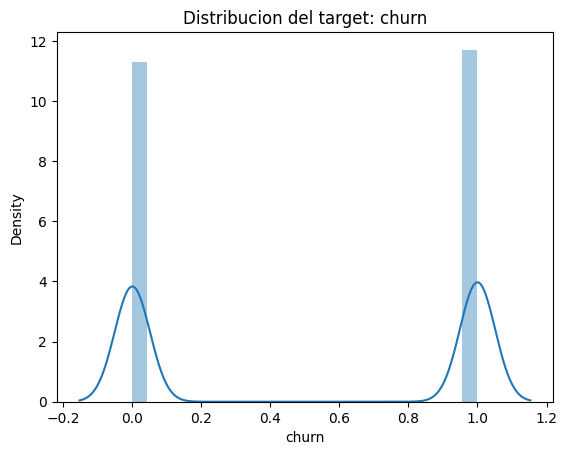

In [16]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+target)
plt.show()

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [17]:
#Vemos si hay filas sin target
# Check si hay filas sin target
df['churn'].isna().any()

False

In [18]:
# Check duplicados
df.index.nunique() != len(df.index)

False

In [19]:
def check_data_types(df):
    for col_name, col_type in df.dtypes.items():
        col_data = df[col_name]
        if col_type == np.float64 and np.issubdtype(col_data.dtype, np.integer):
            print(f"La columna {col_name} es de tipo float64 pero solo contiene datos de tipo int64")
            return 1
        elif col_type == np.int64 and np.issubdtype(col_data.dtype, np.floating):
            print(f"La columna {col_name} es de tipo int64 pero solo contiene datos de tipo float64")
            return 1
        elif col_type == np.object_ and np.issubdtype(col_data.dtype, np.datetime64):
            print(f"La columna {col_name} es de tipo object pero solo contiene datos de tipo datetime64")
            return 1
        elif col_type == np.datetime64 and np.issubdtype(col_data.dtype, np.object_):
            print(f"La columna {col_name} es de tipo datetime64 pero solo contiene datos de tipo object")
            return 1
        elif col_type != col_data.dtype:
            print(f"La columna {col_name} es de tipo {col_type} pero contiene datos de tipo {col_data.dtype}")
            return 1
    return 0


In [20]:
#parece que las columnas corresponden con el contenido
check_data_types(df)


0

In [21]:
#Vemos los valores de las categoricas a ver si hay carácteres con posibles errores de acentos etc....
#Ya vimos en ver_var_class(df) que no hay problemas de ese tipo

In [22]:
#no hay fechas y tampoco parece que haya erratas

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 1000001 to 1090000
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null

In [24]:
#Después de un estudio de los datos se deciden quitar al menos de momento los siguientes columnas que nosaventuramos a decir que son irrelevantes:
#dualband: Banda Dual
#infobase: Concidencia Infobase, no sé lo que es pero de los valores que solo hay uno entiendo que no vamos a sacar información relevante
#HHstatin: indicador del estado del hogar premier: muchos nulos
#truck: Indicador de camión, no sé lo que es, es una variable binaria, dudo que influya por el nombre
#models: Número de modelos emitidos, entiendo que es irrelevante??
#rv: Indicador RV, no sabemos lo que es, lo borramos
#lor: Antigüedad de la vivienda, muchos nulos y creo que será irrelevante
#dwlltype:Tipo de unidad de vivienda, creo que ya hay bastantes categoríasque tiene que ver con el poder adquisitivo del cliente y su vivienda además muchos nulos
#numbcars: demasiados nulos
#forgntvl: Variable ficticia de viajes al extranjero;: ya el nombre tira para atrás
#ownrent: demasiados nulos para lo que dice
#adults: muchos nulos
#dwllsize: tamaño de la vivienda, muchos nulos

df.drop('infobase', axis=1, inplace=True)
df.drop('HHstatin', axis=1, inplace=True)
df.drop('truck', axis=1, inplace=True)
df.drop('models', axis=1, inplace=True)
df.drop('rv', axis=1, inplace=True)
df.drop('lor', axis=1, inplace=True)
df.drop('dwlltype', axis=1, inplace=True)
df.drop('numbcars', axis=1, inplace=True)
df.drop('forgntvl', axis=1, inplace=True)
df.drop('ownrent', axis=1, inplace=True)
df.drop('adults', axis=1, inplace=True)
df.drop('dwllsize', axis=1, inplace=True)
df.drop('ethnic', axis=1, inplace=True)
df.drop('avg6mou', axis=1, inplace=True)
df.drop('avg6qty', axis=1, inplace=True)
df.drop('avg6rev', axis=1, inplace=True)
df.drop('dualband', axis=1, inplace=True)

In [25]:
#Borramos registros que no tienen informado y que son insignificantes
filtro1 = df['refurb_new'].isnull()
df[filtro1]
#Es la misma linea que tiene refurb_new, dual_band, phones a null, la borramos

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,prizm_social_one,area,refurb_new,hnd_price,phones,hnd_webcap,marital,income,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077200,76.98,0.0,86.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13,1,1,U,AA,N,0,0.0,1189.06,930.71,0.0,0,77.56,0.0,0.0,0,0,77,U,SOUTH FLORIDA AREA,NaN,NaN,NaN,NaN,U,NaN,U,U,U,U,U,N,NaN


In [26]:
df2 = df.drop(df[filtro1].index)

# **Tratamiento de outlayers**

In [27]:
#Las variables mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,avg6mou,avg6qty,avg6rev les pondremos outlayer en los transformers
nulos_por_columna=df2.isnull().sum()
indice_pocos_nulos=nulos_por_columna[nulos_por_columna!=0].index
indice_pocos_nulos

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'prizm_social_one', 'area',
       'hnd_price', 'hnd_webcap', 'marital', 'income', 'kid0_2', 'kid3_5',
       'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [28]:
#Las categóricas que quedan también les pondremos U o Unknown dependiendo como sea cada una de ellas

In [29]:
 #Analisis de las distribuciones de las variables , visto de los pasos anteriores
 #eqpdays	Número de días (edad) del equipo actual, tiene valores negativos, imposible, miramos las filas que tiene valores negativos, creo que la mejor estrategía va a ser asignar un outlayer más adelante en el transformer
df2['eqpdays'][df2['eqpdays']<0].value_counts()


-3.0    32
-1.0    27
-2.0    26
-4.0    12
-5.0     5
Name: eqpdays, dtype: int64

In [30]:
#miramos el mínimo valor en todo el dataframe para decir un número que sea un buen outlayer outlayer
df_describe=df2.describe().T
#vemos que valor puede ser un buen outlayer con el min
df_min=pd.DataFrame(df_describe.iloc[:,3], columns=['min'])
#multiplicamos el minimo por 1000 para conseguir el outlayer
outlayer_num=df_min['min'].min()*1000
outlayer_num

-3875000.0

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [31]:
columnas_con_nulos  = df2.columns[df2.isnull().any()]
columnas_con_nulos

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'prizm_social_one', 'area',
       'hnd_price', 'hnd_webcap', 'marital', 'income', 'kid0_2', 'kid3_5',
       'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [32]:
df_nulos = df[columnas_con_nulos]

In [33]:
df_nulos.head(3)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,prizm_social_one,area,hnd_price,hnd_webcap,marital,income,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,S,NORTHWEST/ROCKY MOUNTAIN AREA,149.98999,WCMB,S,4.0,U,U,U,U,U,Y
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,U,CHICAGO AREA,NaN,WC,S,5.0,U,U,U,U,U,Y
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,S,GREAT LAKES AREA,29.98999,NaN,M,5.0,U,Y,U,U,U,Y


In [34]:
df_nulos.shape

(90000, 23)

In [35]:
df_nulos.isnull().sum()

rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            595
change_rev            595
prizm_social_one     6537
area                   40
hnd_price             704
hnd_webcap           9519
marital              1451
income              22196
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd             1451
dtype: int64

In [36]:
# creamos una lista de valores numericos con nulos
valores_clasif_num=df_nulos.select_dtypes(include=['float64','int64']).columns.tolist()
print(valores_clasif_num)

['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'hnd_price', 'income']


In [37]:
#Vamos a quitar hnd_price por que le vamos a aplicar la media
valores_clasif_num.remove('hnd_price')
media_hnd_price=df2['hnd_price'].mean()
media_hnd_price

99.70957487428218

In [38]:
#creamos una lista con los nombres de las columnas categóricas con nulos
indice_clasif=df_nulos.select_dtypes(include='object').columns.tolist()
indice_clasif

['prizm_social_one',
 'area',
 'hnd_webcap',
 'marital',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [39]:
#Respecto a categóricas
#Hacemos una función para separar las variables que deben tener U y las que deben tener Unknown y las que deberán tratarse con un ordinal (kids)
valores_clasif_1=[]
valores_clasif_mas=[]
valores_clasif_kid=[]
for i in indice_clasif:
  l=df_nulos[i].str.len().max()
  kid=i.startswith("kid")
  if l == 1 and kid==False:
    valores_clasif_1.append(i)
  elif l == 1 and kid==True:
    valores_clasif_kid.append(i)
  else:
    valores_clasif_mas.append(i)

print(valores_clasif_1)

['prizm_social_one', 'marital', 'creditcd']


In [40]:
print(valores_clasif_mas)

['area', 'hnd_webcap']


In [41]:
print(valores_clasif_kid)

['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']


In [42]:
#Función outlayer income
def income_outlayers_assign(X):
    X.loc[X['income'].isnull(), 'income'] = outlayer_num
    X.loc[X['income'].notnull(), 'income'] = X['income']
    return X

In [43]:
#creamos una función para el futuro transformer de eqpdays negativos
def eqpdays_outlayers_assign(X):
    X.loc[X['eqpdays'] < 0, 'eqpdays'] = outlayer_num
    X.loc[X['eqpdays'] >= 0, 'eqpdays'] = X['eqpdays']
    return X


In [44]:
#creamos una función para hacer tratamiento ordinal del campo tipo kids
def kids0_2_outlayers_assign(X):
  X.loc[X['kid0_2'] == 'Y','kid0_2'] = 1
  X.loc[X['kid0_2'] == 'U','kid0_2'] = 0
  X.loc[X['kid0_2'].isnull(),'kid0_2'] = X['kid0_2']
  return X

def kids3_5_outlayers_assign(X):
  X.loc[X['kid3_5'] == 'Y','kid3_5'] = 1
  X.loc[X['kid3_5'] == 'U','kid3_5'] = 0
  X.loc[X['kid3_5'].isnull(),'kid3_5'] = X['kid3_5']
  return X

def kids6_10_outlayers_assign(X):
  X.loc[X['kid6_10'] == 'Y','kid6_10'] = 1
  X.loc[X['kid6_10'] == 'U','kid6_10'] = 0
  X.loc[X['kid6_10'].isnull(),'kid6_10'] = X['kid6_10']
  return X

def kids11_15_outlayers_assign(X):
  X.loc[X['kid11_15'] == 'Y','kid11_15'] = 1
  X.loc[X['kid11_15'] == 'U','kid11_15'] = 0
  X.loc[X['kid11_15'].isnull(),'kid11_15'] = X['kid11_15']
  return X

def kids16_17_outlayers_assign(X):
  X.loc[X['kid16_17'] == 'Y','kid16_17'] = 1
  X.loc[X['kid16_17'] == 'U','kid16_17'] = 0
  X.loc[X['kid16_17'].isnull(),'kid16_17'] = X['kid16_17']
  return X


In [45]:
#Vamos a imputar los valores con ColumnTransform
impute = ColumnTransformer(
    transformers=[
        ("col_1",SimpleImputer(strategy="constant",fill_value='-U'),valores_clasif_1),
        ("col_mas",SimpleImputer(strategy="constant",fill_value='-Unknown'),valores_clasif_mas),
        ("col_num",SimpleImputer(strategy="constant",fill_value=outlayer_num),valores_clasif_num),
        ("hnd_price",SimpleImputer(strategy="constant",fill_value=media_hnd_price),["hnd_price"]),
        ("income", FunctionTransformer(func=income_outlayers_assign),["income"]),
        ("eqpdays",FunctionTransformer(func=eqpdays_outlayers_assign),['eqpdays']),
        ("kid_1",FunctionTransformer(func=kids0_2_outlayers_assign),['kid0_2']),
        ("kid_2",FunctionTransformer(func=kids3_5_outlayers_assign),['kid3_5']),
        ("kid_3",FunctionTransformer(func=kids6_10_outlayers_assign),['kid6_10']),
        ("kid_4",FunctionTransformer(func=kids11_15_outlayers_assign),['kid11_15']),
        ("kid_5",FunctionTransformer(func=kids16_17_outlayers_assign),['kid16_17'])

    ],
    remainder='passthrough'
)

In [46]:
#aplicamos fit y transform
df_t=impute.fit_transform(df2)

In [47]:
df_t.shape

(89999, 83)

In [48]:
#Qeudan los nulos de kids que los vamos a tratar más adelante
nulos=pd.DataFrame(df_t.isnull().sum())
nulos[nulos[0]>0]

,0
kid_1__kid0_2,1451
kid_2__kid3_5,1451
kid_3__kid6_10,1451
kid_4__kid11_15,1451
kid_5__kid16_17,1451


# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [49]:
#A los campos binarios les aplicamos ordinal encoding
df_t[df_t.filter(like='flag').columns.tolist()].value_counts()

remainder__asl_flag
N                      79400
Y                      10599
dtype: int64

In [50]:
df_t[df_t.filter(like='refur').columns.tolist()].value_counts()

remainder__refurb_new
N                        76624
R                        13375
dtype: int64

In [ ]:
#muchas categorías sin relación aparente, ONE HOT ENCODING
#Las columnas en las que haremos un ONE HOT ENCODING son aquellas categóricas en las que existen más de 2 valores y que no tienen una relación de ordinalidad en nuestro caso
#new_cell, prizm_social_one, area, hnd_webcap, ownrent, marital, creditcd

In [51]:
df_t[df_t.filter(like='area').columns.tolist()].value_counts()

col_mas__area                
NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
ATLANTIC SOUTH AREA               5526
CALIFORNIA NORTH AREA             5476
DALLAS AREA                       5106
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
NORTH FLORIDA AREA                3996
CENTRAL/SOUTH TEXAS AREA          3962
HOUSTON AREA                      3887
SOUTH FLORIDA AREA                3118
TENNESSEE AREA                    2554
PHILADELPHIA AREA                 2263
-Unknown                            40
dtype: int64

In [52]:
#-U unir U
df_t[df_t.filter(like='_prizm').columns.tolist()].value_counts()

col_1__prizm_social_one
S                          29203
U                          20934
C                          15244
T                          13705
-U                          6537
R                           4376
dtype: int64

In [53]:
def prizm_social_one_unkw(X):
    X.loc[X['col_1__prizm_social_one'] == '-U', 'col_1__prizm_social_one'] = 'U'
    X.loc[X['col_1__prizm_social_one'] != '-U', 'col_1__prizm_social_one'] = X['col_1__prizm_social_one']
    return X

In [54]:
df_t[df_t.filter(like='cell').columns.tolist()].value_counts()

remainder__new_cell
U                      58811
Y                      18114
N                      13074
dtype: int64

In [55]:
#unir -Unknown y UNKW
df_t[df_t.filter(like='_webca').columns.tolist()].value_counts()

col_mas__hnd_webcap
WCMB                   67396
WC                     12883
-Unknown                9518
UNKW                     202
dtype: int64

In [56]:
def hnd_webcap_unkw(X):
    X.loc[X['col_mas__hnd_webcap'] == '-Unknown', 'col_mas__hnd_webcap'] = 'UNKW'
    X.loc[X['col_mas__hnd_webcap'] != '-Unknown', 'col_mas__hnd_webcap'] = X['col_mas__hnd_webcap']
    return X

In [57]:
#U unirlo con -U
df_t.groupby('col_1__marital')['col_1__marital'].count()

col_1__marital
-U     1451
A      4738
B      6391
M     28419
S     15951
U     33049
Name: col_1__marital, dtype: int64

In [58]:
def marital_unkw(X):
    X.loc[X['col_1__marital'] == '-U', 'col_1__marital'] = 'U'
    X.loc[X['col_1__marital'] != '-U', 'col_1__marital'] = X['col_1__marital']
    return X

In [59]:
df_t.groupby('col_1__creditcd')['col_1__creditcd'].count()

col_1__creditcd
-U     1451
N     26832
Y     61716
Name: col_1__creditcd, dtype: int64

In [60]:
#se ha procedido a tratar cada columan separadamente
def kid_assign(X):
  resultado =  X['kid_1__kid0_2']+X['kid_2__kid3_5']+X['kid_3__kid6_10']+X['kid_4__kid11_15']+X['kid_5__kid16_17']
  return pd.DataFrame(resultado, columns=['kids'])


In [61]:
impute2 = ColumnTransformer(
    transformers=[
         ("crclscod",OrdinalEncoder(),['remainder__crclscod']),
         ("asl_flag",OrdinalEncoder(),['remainder__asl_flag']),
         ("refurb_new",OrdinalEncoder(),['remainder__refurb_new']),
         ("prizm_social_one",FunctionTransformer(func=prizm_social_one_unkw),['col_1__prizm_social_one']),
         ("hnd_webcap",FunctionTransformer(func=hnd_webcap_unkw),['col_mas__hnd_webcap']),
         ("marital",FunctionTransformer(func=marital_unkw),['col_1__marital']),
         ("area",OneHotEncoder(sparse_output=False),["col_mas__area"]),
         ("new_cell",OneHotEncoder(sparse_output=False),["remainder__new_cell"]),
         ("creditcd",OneHotEncoder(sparse_output=False),["col_1__creditcd"]),
         ("kids",FunctionTransformer(func=kid_assign),['kid_1__kid0_2','kid_2__kid3_5','kid_3__kid6_10','kid_4__kid11_15','kid_5__kid16_17']),
    ],
    remainder='passthrough'
)


In [62]:
#aplicamos fit y transform a nuestras funciones
df_t2=impute2.fit_transform(df_t)

In [65]:
#verificación
df_t2[df_t2.filter(like='kid').columns.tolist()].isnull().sum()

kids__kids    1451
dtype: int64

In [ ]:
df_t2[df_t2.filter(like='marital').columns.tolist()].value_counts()

marital__col_1__marital
U                          34500
M                          28419
S                          15951
B                           6391
A                           4738
dtype: int64

In [ ]:
df_t2[df_t2.filter(like='webcap').columns.tolist()].value_counts()

hnd_webcap__col_mas__hnd_webcap
WCMB                               67396
WC                                 12883
UNKW                                9720
dtype: int64

In [ ]:
df_t2[df_t2.filter(like='prizm').columns.tolist()].value_counts()

prizm_social_one__col_1__prizm_social_one
S                                            29203
U                                            27471
C                                            15244
T                                            13705
R                                             4376
dtype: int64

In [67]:
impute3 = ColumnTransformer(
    transformers = [
        ("hnd_web_cap",OneHotEncoder(sparse_output=False),["hnd_webcap__col_mas__hnd_webcap"]),
        ("prizm_social_one",OneHotEncoder(sparse_output=False),["prizm_social_one__col_1__prizm_social_one"]),
        ("marital",OneHotEncoder(sparse_output=False),["marital__col_1__marital"]),
        ("kids",SimpleImputer(strategy="constant",fill_value=outlayer_num),["kids__kids"])
    ],
    remainder="passthrough"

)

In [68]:
df_t3=impute3.fit_transform(df_t2)

In [71]:
df_t3.shape

(89999, 112)

In [78]:
df_t3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Columns: 112 entries, hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW to remainder__remainder__remainder__phones
dtypes: float64(102), int64(9), object(1)
memory usage: 79.6+ MB


In [70]:
df_t3[df_t3.filter(like='kid').columns.tolist()].value_counts()

kids__kids__kids
 0.0                67314
 1.0                12279
 2.0                 6988
 3.0                 1749
-3875000.0           1451
 4.0                  205
 5.0                   13
dtype: int64

In [84]:
#creamos la funcón para transformar las dos columnas que son numeros(col_kid__kids y dwllsize__col_1__dwllsize) a integers y la web_cap usaremos ahora sí un OneHotEncoder
def cambiar_columna_int(column):
    return column.astype('int64')

In [82]:
#pasamos kids a integer
impute4 = ColumnTransformer(
    transformers = [
        ("kids",FunctionTransformer(func=cambiar_columna_int),['kids__kids__kids'])
    ],
    remainder="passthrough"

)

In [86]:
df_t4=impute4.fit_transform(df_t3)

In [88]:
#vamos a crear un pipe para hacer todas las transformaciones seguidascpara poder ejecutar de manera rápida
pipe = Pipeline(
    steps = [
        ("imputer1",impute),
        ("imputer2",impute2),
        ("imputer3",impute3),
        ("imputer4",impute4)
    ]
)

In [89]:
df_t4=pipe.fit_transform(df2)

In [90]:
df_t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Columns: 112 entries, kids__kids__kids__kids to remainder__remainder__remainder__remainder__phones
dtypes: float64(102), int64(10)
memory usage: 79.6 MB


In [92]:
#Con esta función pasamos todos aquello números que sean de tipo float pero que contengan datos enteros a tipo entero
def ConvertFloatsToInt(X):
  lista_columnas=[]
  for i in X:
      if X[i].dtype.kind =="f" and np.modf(X[i])[0].sum()==0 and X[i].isnull().sum()==0:
        lista_columnas.append([i])
        X[i]=X[i].astype('int64')
  print(lista_columnas)
  return X

In [93]:
df_t5 = ConvertFloatsToInt(df_t4)

[['remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW'], ['remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WC'], ['remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WCMB'], ['remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_C'], ['remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_R'], ['remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_S'], ['remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_T'], ['remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_U'], ['remainder__marital__marital__col_1__marital_A'], ['remainder__marital__marital__col_1__marital_B'], ['remainder__marital__marital__col_1__marital_M'], ['remainder__marital__marital__col_1__marital_S'], ['remainder__marital__marital__col_1__marital_U'], ['remainder__remainder__crclscod__remainder__crclscod'], ['remainder__remainder__asl_flag__remainder__asl_flag'], ['remainder__remainder__refurb_new__remainde

In [94]:
df_t5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Columns: 112 entries, kids__kids__kids__kids to remainder__remainder__remainder__remainder__phones
dtypes: float64(56), int64(56)
memory usage: 79.6 MB


In [95]:
df_t5.shape

(89999, 112)

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [96]:
#definimos el target
target = df_t5.filter(like='churn').columns.tolist()[0]
features = df_t5.columns[df_t5.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_t5[features]
y = df_t5[target]

In [107]:
corr_matrix=df_t5.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")

In [97]:
#Función de detección alta correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
aborrar_=pd.DataFrame(highly_corr['F_to_delete'].unique())[0].to_list()
print(len(aborrar_),' low variance features were removed:\n', aborrar_)

22  low variance features were removed:
 ['remainder__remainder__creditcd__col_1__creditcd_-U', 'remainder__remainder__creditcd__col_1__creditcd_Y', 'remainder__remainder__remainder__col_num__rev', 'remainder__remainder__remainder__col_num__totmrc', 'remainder__remainder__remainder__col_num__da', 'remainder__remainder__remainder__col_num__ovrmou', 'remainder__remainder__remainder__col_num__ovrrev', 'remainder__remainder__remainder__col_num__vceovr', 'remainder__remainder__remainder__col_num__datovr', 'remainder__remainder__remainder__col_num__roam', 'remainder__remainder__remainder__col_num__change_rev', 'remainder__remainder__remainder__col_num__income', 'remainder__remainder__remainder__remainder__plcd_vce', 'remainder__remainder__remainder__remainder__comp_dat', 'remainder__remainder__remainder__remainder__cc_mou', 'remainder__remainder__remainder__remainder__inonemin', 'remainder__remainder__remainder__remainder__mou_opkd', 'remainder__remainder__remainder__remainder__attempt', 're

In [98]:
df_t5.drop(aborrar_, axis=1, inplace=True)

In [99]:
df_t5.shape

(89999, 90)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [100]:
features = df_t5.columns[df_t5.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_t5[features]

from sklearn.feature_selection import VarianceThreshold

In [101]:
# Eliminamos columnas prácticamente constantes (nula varianza), si el 99% de los valores son iguales este step te los filtra
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())
aborrar_=cols_lowvar

1  low variance features were removed:
 ['remainder__remainder__area__col_mas__area_-Unknown']


In [102]:
#borramos los columnas
df_t5.drop(aborrar_, axis=1, inplace=True)

In [103]:
df_t5.shape

(89999, 89)

In [104]:
#orden de las variables
features = df_t5.columns[df_t5.columns!=target]
X = df_t5[features]
columnas = X.columns
for i in columnas:
  print(i)

kids__kids__kids__kids
remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW
remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WC
remainder__hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WCMB
remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_C
remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_R
remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_S
remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_T
remainder__prizm_social_one__prizm_social_one__col_1__prizm_social_one_U
remainder__marital__marital__col_1__marital_A
remainder__marital__marital__col_1__marital_B
remainder__marital__marital__col_1__marital_M
remainder__marital__marital__col_1__marital_S
remainder__marital__marital__col_1__marital_U
remainder__remainder__crclscod__remainder__crclscod
remainder__remainder__asl_flag__remainder__asl_flag
remainder__remainder__refurb_new__remainder__refurb_new
remainder__remainder__area__col_mas__area

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [105]:
fichero_pickle_='/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/churn_processed_train_data.pkl'

In [106]:
df_t5.to_pickle(fichero_pickle_)

In [ ]:
#fin